#### 1.  import

In [1]:
# select specific file
# 특정 단어를 포함하고 있는 이미지 분류
import os, shutil
import os.path

import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt

from pathlib import Path
import imageio
import cv2

In [2]:
pwd

'/home/gyun941222/mildy/prepare'

In [3]:
e_data_crop_path = '/home/gyun941222/mildy/data/e_data'
data_check_path = '/home/gyun941222/mildy/data/e_data/orig'

ang_path = '/home/gyun941222/mildy/data/e_data/orig/ang'
hap_path = '/home/gyun941222/mildy/data/e_data/orig/hap'
neu_path = '/home/gyun941222/mildy/data/e_data/orig/neu'

ang_new_path = '/home/gyun941222/mildy/data/e_data/crop/crop_ang'
hap_new_path = '/home/gyun941222/mildy/data/e_data/crop/crop_hap'
neu_new_path = '/home/gyun941222/mildy/data/e_data/crop/crop_neu'

#### 2. 경로상에서 dir이 있는지 확인

In [4]:
for path, dirs, files in os.walk(data_check_path):
    print("Path >>>", path)
    print("Dir >>>" , dirs)
    print("Files >>>" , files)
    print("=" * 100)

Path >>> /home/gyun941222/mildy/data/e_data/orig
Dir >>> ['neu', 'hap', 'ang', '.ipynb_checkpoints']
Files >>> ['hap_exp_rename.zip', 'ang_exp_rename.zip', 'neu_exp_rename.zip']
Path >>> /home/gyun941222/mildy/data/e_data/orig/neu
Dir >>> []
Files >>> ['647_neu.jpg', '621_neu.jpg', '368_neu.jpg', '257_neu.jpg', '160_neu.jpg', '428_neu.jpg', '115_neu.jpg', '399_neu.jpg', '344_neu.jpg', '416_neu.jpg', '64_neu.jpg', '4_neu.jpg', '441_neu.jpg', '653_neu.jpg', '96_neu.jpg', '219_neu.jpg', '140_neu.jpg', '171_neu.jpg', '109_neu.jpg', '266_neu.jpg', '206_neu.jpg', '583_neu.jpg', '340_neu.jpg', '422_neu.jpg', '485_neu.jpg', '193_neu.jpg', '231_neu.jpg', '141_neu.jpg', '73_neu.jpg', '221_neu.jpg', '217_neu.jpg', '487_neu.jpg', '330_neu.jpg', '194_neu.jpg', '432_neu.jpg', '520_neu.jpg', '440_neu.jpg', '33_neu.jpg', '199_neu.jpg', '646_neu.jpg', '415_neu.jpg', '187_neu.jpg', '603_neu.jpg', '378_neu.jpg', '144_neu.jpg', '391_neu.jpg', '545_neu.jpg', '249_neu.jpg', '224_neu.jpg', '305_neu.jpg', '47

In [11]:
# 체크 포인트 파일이 존재한다면 사용할것!
if os.listdir(os.path.join(os.curdir,neu_path)):
    os.rmdir(neu_path +'/.ipynb_checkpoints')

In [5]:
list = os.listdir(ang_path)
number_files = len(list)
print ("ang img 카운트 :",number_files)
list = os.listdir(hap_path)
number_files = len(list)
print ("hap img 카운트 :",number_files)
list = os.listdir(neu_path)
number_files = len(list)
print ("neu img 카운트 :",number_files)

ang img 카운트 : 787
hap img 카운트 : 640
neu img 카운트 : 655


#### 3. dir 체크포인트를 제거하지 못해서 빈폴더가 생겼다면 사용.

In [352]:
import os
import pandas

In [18]:
# for file in files :
#     if os.path.isdir(file) :
#         print(file + '\t' + 'directory')
#         os.rmdir(file)
#         print("해당하는 Dir 제거 완료!")
#     else :
#         print(file + '\t' + 'file')

#### 4. dlib를 이용해서 이미지 crop
- 마스크를 쓴 사진은 제대로 crop하지 못하지만 마스크 안 쓴 사진은 제대로 crop한다.
- 마스크를 쓴 사진은 xml 좌표를 활용해서 눈을 인식해주자

In [6]:
def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

def read_image(img):
    return cv2.imread(img)

/home/gyun941222/anaconda3/envs/test3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/gyun941222/anaconda3/envs/test3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


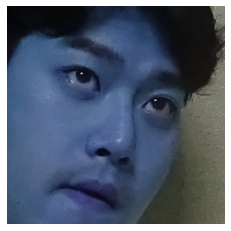

In [7]:
d = ang_path
for img in os.listdir(ang_path):
    if not d.startswith('.'):
        path = ang_path + '/' + img
        image = read_image(path)
        detected_faces = detect_faces(image)
        for n, face_rect in enumerate(detected_faces):
            face = Image.fromarray(image).crop(face_rect)
            plt.subplot(1, len(detected_faces), n+1)
            plt.axis('off')
            plt.imshow(face)
            face.save(os.path.join(ang_new_path, 'c_' + img))
    path = ang_path + '/' + img
    image = read_image(path)
    detected_faces = detect_faces(image)
    for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(image).crop(face_rect)
        face = cv2.cvtColor(face, cv2.BGR2RGB)
        plt.subplot(1, len(detected_faces), n+1)
        plt.axis('off')
        plt.imshow(face)
        face.save(os.path.join(ang_new_path, 'c_' + img))

In [8]:
list = os.listdir(ang_new_path)
number_files = len(list)
print ("ang crop img 카운트 :",number_files)

ang crop img 카운트 : 785


---

/home/gyun941222/anaconda3/envs/test3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/gyun941222/anaconda3/envs/test3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


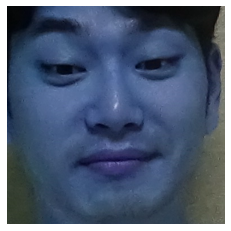

In [9]:
d = hap_path
for img in os.listdir(hap_path):
    if not d.startswith('.'):
        path = hap_path + '/' + img
        image = read_image(path)
        detected_faces = detect_faces(image)
        for n, face_rect in enumerate(detected_faces):
            face = Image.fromarray(image).crop(face_rect)
            plt.subplot(1, len(detected_faces), n+1)
            plt.axis('off')
            plt.imshow(face)
            face.save(os.path.join(hap_new_path, 'c_' + img))
    path = hap_path + '/' + img
    image = read_image(path)
    detected_faces = detect_faces(image)
    for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(image).crop(face_rect)
        plt.subplot(1, len(detected_faces), n+1)
        plt.axis('off')
        plt.imshow(face)
        face.save(os.path.join(hap_new_path, 'c_' + img))

In [10]:
list = os.listdir(hap_new_path)
number_files = len(list)
print ("hap crop img 카운트 :",number_files)

hap crop img 카운트 : 640


---

/home/gyun941222/anaconda3/envs/test3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/gyun941222/anaconda3/envs/test3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


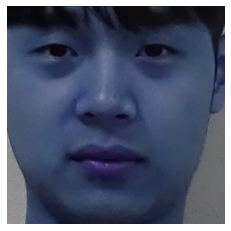

In [11]:
d = neu_path
for img in os.listdir(neu_path):
    if not d.startswith('.'):
        path = neu_path + '/' + img
        image = read_image(path)
        detected_faces = detect_faces(image)
        for n, face_rect in enumerate(detected_faces):
            face = Image.fromarray(image).crop(face_rect)
            plt.subplot(1, len(detected_faces), n+1)
            plt.axis('off')
            plt.imshow(face)
            face.save(os.path.join(neu_new_path, 'c_' + img))
    path = neu_path + '/' + img
    image = read_image(path)
    detected_faces = detect_faces(image)
    for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(image).crop(face_rect)
        plt.subplot(1, len(detected_faces), n+1)
        plt.axis('off')
        plt.imshow(face)
        face.save(os.path.join(neu_new_path, 'c_' + img))

In [12]:
list = os.listdir(neu_new_path)
number_files = len(list)
print ("neu crop img 카운트 :",number_files)

neu crop img 카운트 : 655
